In [1]:
### Coursework
from numpy.random import rand
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import poisson
import pandas as pd

In [2]:
### Question 1
k0 = 0.2 # Production of mRNA, units: s^-1
k1 = 0.01 # Decay of mRNA

In [3]:
### Question 2

# Defining propensities (rate reactions)
k0 = 0.2
k1 = 0.01

# Defining propensities (rate reactions)
def propensities(x):
    return [k0, k1*x]

# Defining reaction times (the two reactions race against each other)
def reactionTimes(x):
    a = propensities(x) 
    
    # Setting a filter: no error if a == 0
    # aInv is the inverse of a, so the lower the aInv, the greater the chance of that reaction happening
    aInv = [ 1/s if s>0 else np.inf for s in a ]
    
    # Returns 2x1 list; the lower the number, the shorter the time that the reaction took this iteration
    # The lower number 'wins the race'
    return -np.log(rand(2))*aInv

# Defining Stochastic Simulation Algorithm
def ssa(x, tIn, tOut):
    t = tIn
    stoichiometry = [+1, -1] # Whether the reaction increases or decreases number of mRNA
    
    while t < tOut:
        rt= reactionTimes(x)
        
        # Reaction time
        tau = np.min(rt) # Samples minimum from array (reaction that 'won')
        
        # Returns index of the reaction (which reaction was chosen)
        idx = np.argmin(rt)
        
        # Update state of time with increment tau
        if t+tau > tOut:
            t = tOut
        else:
            t += tau
            x += stoichiometry[idx]
    return x

# Mu is the deterministic mean
mu = k0/k1

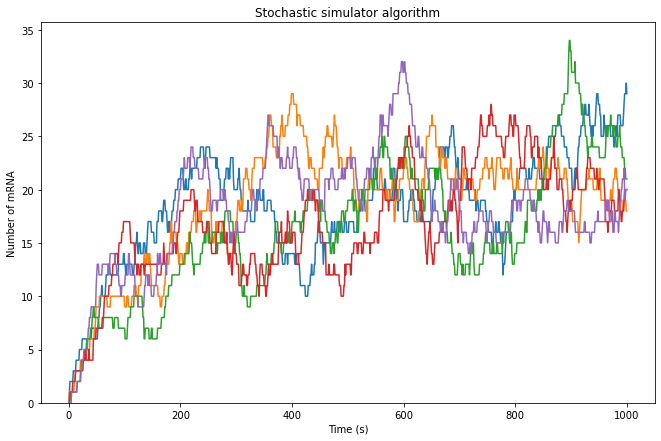

In [4]:
# Setting up the Stochastic Simulation Algorithm

# Storing results in a dataframe
results = pd.DataFrame()

# Creating a plot 
fig, ax = plt.subplots(figsize=(11,7))

# Running the stochastic simulator with repeats
for j in range(5):
    # Define initial mRNA count and initial time
    x = 0
    t = 0.
    dt = 1

    mrna = [x]
    time = [t]
    
    # Iterate over time, adding dt as a time increment
    for i in range(1000):
        x = ssa(x, t, t+dt)
        time.append(time[-1]+dt)
        mrna.append(x)

    # Plot number of mRNA as a function of time
    ax.plot(time, mrna)

# Setting graph titles
title = "Stochastic simulator algorithm"
y_title = "Number of mRNA"
x_title = "Time (s)"

ax.set_title(title)
ax.set_ylabel(y_title)
ax.set_xlabel(x_title)
ax.set_ylim(bottom=0)
plt.show(fig)

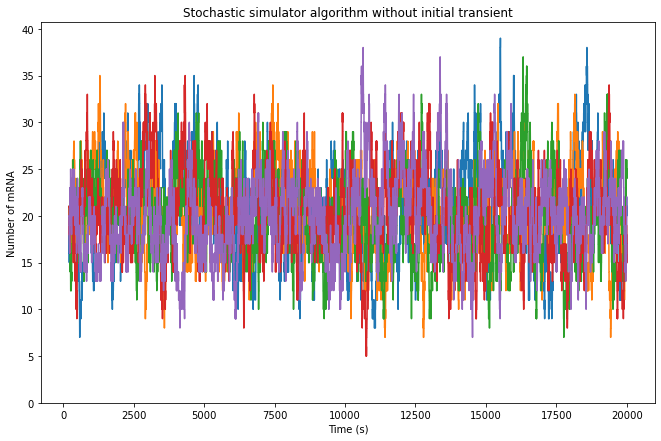

     mu       mean   variance  Fano factor
0  20.0  20.667997  24.399748     1.180557
1  20.0  20.319125  18.002245     0.885975
2  20.0  19.715721  19.115135     0.969538
3  20.0  20.324226  19.634689     0.966073
4  20.0  19.903742  18.845843     0.946849
Average mean: 20.186162315034593
Average variance: 19.999531882812743
Mean Fano factor: 0.9897984855089123


In [5]:
### Question 3
# Running SSA but removing the initial transient by graphical inspection

# Storing results in a dataframe
results = pd.DataFrame()

# Creating a plot 
fig, ax = plt.subplots(figsize=(11,7))

# Set initial t value to plot
t0_plot = 200

# Running the stochastic simulator with repeats
for j in range(5):
    # Define initial mRNA count and initial time
    x = 0
    t = 0.
    dt = 1

    mrna = [x]
    time = [t]
    
    # Iterate over time, adding dt as a time increment
    for i in range(20000):
        x = ssa(x, t, t+dt)
        time.append(time[-1]+dt)
        mrna.append(x)

    # Output results in dataframe
    mean = np.mean(mrna[t0_plot:])
    var = np.var(mrna[t0_plot:])
    fano = var/mean
    results = results.append({"mu": mu, "mean":mean, "variance":var, "Fano factor":fano}, ignore_index=True)
    
    # Plot number of mRNA as a function of time
    ax.plot(time[t0_plot:], mrna[t0_plot:])

# Setting graph titles
title = "Stochastic simulator algorithm without initial transient"
y_title = "Number of mRNA"
x_title = "Time (s)"

ax.set_title(title)
ax.set_ylabel(y_title)
ax.set_xlabel(x_title)
ax.set_ylim(bottom=0)
plt.show(fig)

print(results)
print("Average mean: {}".format(np.mean(results['mean'])))
print("Average variance: {}".format(np.mean(results['variance'])))
print("Mean Fano factor: {}".format(np.mean(results['Fano factor'])))


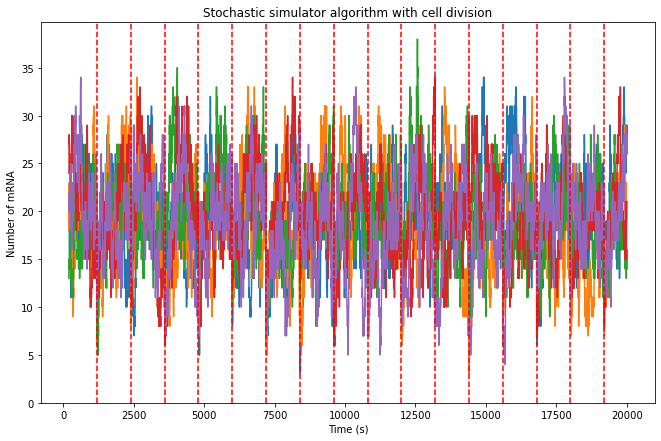

     mu       mean   variance  Fano factor
0  20.0  18.970052  21.728359     1.145403
1  20.0  18.487854  25.570695     1.383108
2  20.0  19.366648  19.859913     1.025470
3  20.0  19.495733  21.968784     1.126851
4  20.0  18.723701  23.539183     1.257186
Mean Fano factor: 1.1876036397919907


In [7]:
### Question 4

# Storing results in a dataframe
results = pd.DataFrame()

# Creating a plot 
fig, ax = plt.subplots(figsize=(11,7))

# Running the stochastic simulator with repeats, with cell division
for j in range(5):

    # Define initial mRNA count and initial time
    x = 0
    t = 0.
    dt = 1
    # First time point to be plotted
    t0_plot = 200

    mrna = [x]
    time = [t]
    t_celldiv = [] # Time points at which the cell divides

    # Iterate over time, adding dt as a time increment
    for i in range(20000):
        # Binomial sampling if t = 20 min
        if ((i % 1200 == 0) and (i != 0)):
            x = np.random.binomial(mrna[-1], 0.5)
            t_celldiv.append(i)
        # Regardless of whether the cell splits, mRNA synthesis/degradation still happens
        x = ssa(x, t, t+dt)
        time.append(time[-1]+dt)
        mrna.append(x)

    # Plot number of mRNA as a function of time
    ax.plot(time[t0_plot:], mrna[t0_plot:])
    
    # Output results in dataframe
    mean = np.mean(mrna[t0_plot:])
    var = np.var(mrna[t0_plot:])
    fano = var/mean
    results = results.append({"mu": mu, "mean":mean, "variance":var, "Fano factor":fano}, ignore_index=True)

# Setting graph titles
title = "Stochastic simulator algorithm with cell division"
y_title = "Number of mRNA"
x_title = "Time (s)"

ax.set_title(title)
ax.set_ylabel(y_title)
ax.set_xlabel(x_title)
ax.set_ylim(bottom=0)

# Add lines for cell division
for k in t_celldiv:
    ax.axvline(x=k, ymin=0, ymax=1, color='red', linestyle='dashed')

plt.show(fig)


print(results)
print("Mean Fano factor: {}".format(np.mean(results['Fano factor'])))


In [8]:
### Question 5

k2 = 5

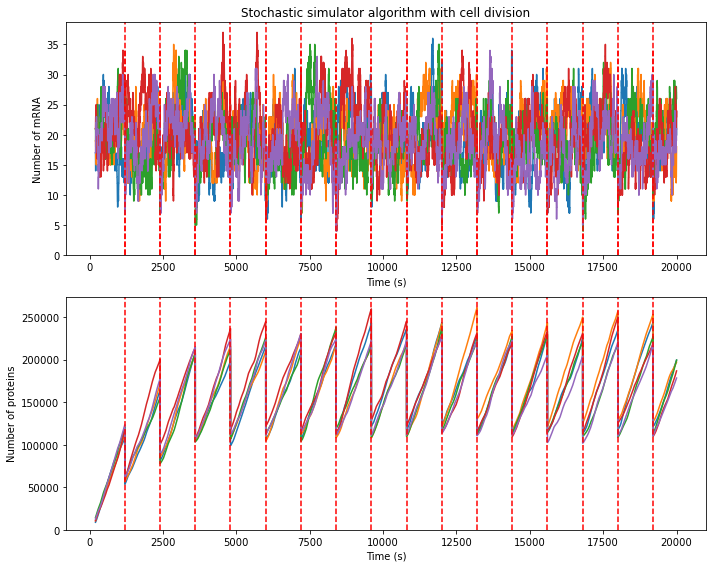

mRNA levels:
     mu       mean   variance  Fano factor
0  20.0  19.246301  21.211140     1.102089
1  20.0  19.736326  20.902397     1.059082
2  20.0  18.971971  22.326723     1.176827
3  20.0  19.930206  26.006239     1.304866
4  20.0  18.754356  21.812191     1.163047
mRNA 
Average mean: 19.32783192768042 
Average Fano factor: 1.16118212751087

protein levels:
            mean      variance   Fano factor
0  157139.601788  1.917461e+09  9.962751e+07
1  161121.880966  2.115828e+09  1.072047e+08
2  154528.985657  1.740179e+09  9.172367e+07
3  163192.628908  1.983020e+09  9.949822e+07
4  153127.895056  1.662832e+09  8.866377e+07
Protein 
Average mean: 157822.19847482452 
Average Fano factor: 97343582.64441225


In [9]:
# Storing results in a dataframe
results_mrna = pd.DataFrame()
results_protein = pd.DataFrame()

# Creating a plot 
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Running the stochastic simulator with repeats, with cell division
for j in range(5):

    # Define initial mRNA count and initial time
    x = 0
    y = 0
    t = 0.
    dt = 1
    # First time point to be plotted
    t0_plot = 200

    mrna = [x]
    time = [t]
    protein = [y]
    t_celldiv = [] # Time points at which the cell divides

    # Iterate over time, adding dt as a time increment
    for i in range(20000):
        # Binomial sampling if t = 20 min
        if ((i % 1200 == 0) and (i != 0)):
            x = np.random.binomial(mrna[-1], 0.5)
            y = np.random.binomial(protein[-1], 0.5)
            t_celldiv.append(i)
        # Regardless of whether the cell splits, mRNA and protein synthesis/degradation still happen
        x = ssa(x, t, t+dt)
        y += k2 * x
        time.append(time[-1]+dt)
        mrna.append(x)
        protein.append(y)

    # Plot number of mRNA as a function of time
    ax1.plot(time[t0_plot:], mrna[t0_plot:])
    ax2.plot(time[t0_plot:], protein[t0_plot:])
    
    # Output results in dataframe
    mean_1 = np.mean(mrna[t0_plot:])
    var_1 = np.var(mrna[t0_plot:])
    fano_1 = var_1/mean_1
    results_mrna = results_mrna.append({"mu": mu, "mean":mean_1, "variance":var_1, "Fano factor":fano_1}, ignore_index=True)
    
    mean_2 = np.mean(protein[t0_plot:])
    var_2 = np.var(protein[t0_plot:])
    fano_2 = var_2/mean_1
    results_protein = results_protein.append({"mean":mean_2, "variance":var_2, "Fano factor":fano_2}, ignore_index=True)

# Setting graph titles
title = "Stochastic simulator algorithm with cell division"
y_title1 = "Number of mRNA"
x_title1 = "Time (s)"

ax1.set_title(title)
ax1.set_ylabel(y_title1)
ax1.set_xlabel(x_title1)
ax1.set_ylim(bottom=0)

# Add lines for cell division
ax1.vlines(t_celldiv, 0, np.amax(mrna), colors='red', linestyles='dashed')

# Protein graph
y_title2 = "Number of proteins"
x_title2 = "Time (s)"

ax2.set_ylabel(y_title2)
ax2.set_xlabel(x_title2)
ax2.set_ylim(bottom=0)

# Add lines for cell division
for k in t_celldiv:
    ax1.axvline(x=k, ymin=0, ymax=1, color='red', linestyle='dashed')
    ax2.axvline(x=k, ymin=0, ymax=1, color='red', linestyle='dashed')

plt.tight_layout()
plt.show(fig)

print("mRNA levels:")
print(results_mrna)
print("mRNA \nAverage mean: {} \nAverage Fano factor: {}".format(np.mean(results_mrna['mean']), np.mean(results_mrna['Fano factor'])))
print("\nprotein levels:")
print(results_protein)
print("Protein \nAverage mean: {} \nAverage Fano factor: {}".format(np.mean(results_protein['mean']),np.mean(results_protein['Fano factor'])))


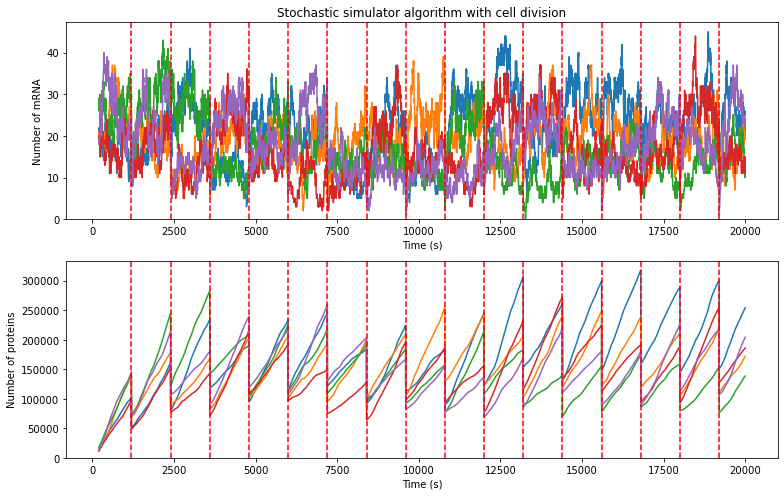

mRNA levels:
     mu       mean   variance  Fano factor
0  20.0  21.550831  61.007782     2.830878
1  20.0  18.566386  30.999090     1.669635
2  20.0  16.580981  51.989112     3.135467
3  20.0  16.832736  51.157316     3.039156
4  20.0  17.650775  52.171613     2.955769
Average mean: 18.236341598909146 
Average variance: 49.46498261407892 
Average Fano factor: 2.726181106355164

protein levels:
            mean      variance   Fano factor
0  173863.880360  3.451553e+09  1.601587e+08
1  152164.792182  1.684767e+09  9.074289e+07
2  138024.982072  1.697253e+09  1.023614e+08
3  136449.678047  2.058906e+09  1.223156e+08
4  141934.118226  1.625600e+09  9.209796e+07
Average mean: 148487.4901772638 
Average varience: 2103615957.25845 
Average Fano factor: 113535313.70376508


In [12]:
### Question 6

# Storing results in a dataframe
results_mrna = pd.DataFrame()
results_protein = pd.DataFrame()

# Creating a plot 
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(11,7))

# Running the stochastic simulator with repeats
for j in range(5):

    # Define initial mRNA count and initial time
    x = 0
    y = 0
    t = 0.
    dt = 1
    # First time point to be plotted
    t0_plot = 200

    mrna = [x]
    time = [t]
    protein = [y]
    t_celldiv = [] # Time points at which the cell divides

    # Generate initial k0, where 0.1 <= k0 <= 0.4 s^-1
    k0 = np.random.uniform(0.1, 0.3)
    
    # Iterate over time, adding dt as a time increment
    for i in range(20000):
        # Binomial sampling if t = 20 min
        if ((i % 1200 == 0) and (i != 0)):
            x = np.random.binomial(mrna[-1], 0.5)
            y = np.random.binomial(protein[-1], 0.5)
            t_celldiv.append(i)
            
            # Generate k0, where 0.1 <= k0 <= 0.4 s^-1
            k0 = np.random.uniform(0.1, 0.3)
        x = ssa(x, t, t+dt)
        y += k2 * x
        time.append(time[-1]+dt)
        mrna.append(x)
        protein.append(y)        

    # Plot number of mRNA as a function of time
    ax1.plot(time[t0_plot:], mrna[t0_plot:])
    ax2.plot(time[t0_plot:], protein[t0_plot:])
    
    # Output results in dataframe
    mean_1 = np.mean(mrna[t0_plot:])
    var_1 = np.var(mrna[t0_plot:])
    fano_1 = var_1/mean_1
    results_mrna = results_mrna.append({"mu": mu, "mean":mean_1, "variance":var_1, "Fano factor":fano_1}, ignore_index=True)
    
    mean_2 = np.mean(protein[t0_plot:])
    var_2 = np.var(protein[t0_plot:])
    fano_2 = var_2/mean_1
    results_protein = results_protein.append({"mean":mean_2, "variance":var_2, "Fano factor":fano_2}, ignore_index=True)

# Setting graph titles
title = "Stochastic simulator algorithm with cell division"
y_title1 = "Number of mRNA"
x_title1 = "Time (s)"

ax1.set_title(title)
ax1.set_ylabel(y_title1)
ax1.set_xlabel(x_title1)
ax1.set_ylim(bottom=0)

# Protein graph
y_title2 = "Number of proteins"
x_title2 = "Time (s)"

ax2.set_ylabel(y_title2)
ax2.set_xlabel(x_title2)
ax2.set_ylim(bottom=0)

# Add lines for cell division
for k in t_celldiv:
    ax1.axvline(x=k, ymin=0, ymax=1, color='red', linestyle='dashed')
    ax2.axvline(x=k, ymin=0, ymax=1, color='red', linestyle='dashed')

plt.tight_layout()
plt.show(fig)

print("mRNA levels:")
print(results_mrna)
print("Average mean: {} \nAverage variance: {} \nAverage Fano factor: {}".format(np.mean(results_mrna['mean']),np.mean(results_mrna['variance']), np.mean(results_mrna['Fano factor'])))
print("\nprotein levels:")
print(results_protein)
print("Average mean: {} \nAverage varience: {} \nAverage Fano factor: {}".format(np.mean(results_protein['mean']),np.mean(results_protein['variance']),np.mean(results_protein['Fano factor'])))
